# Classifying Electrocardiograms

## (1) Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 rows

In [1]:
import pandas as pd
# pd.set_option("display.max_columns", None)

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv"
data = pd.read_csv(url)

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (0)

## (2) Data Exploration

In [40]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score,learning_curve,cross_validate,train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report



❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

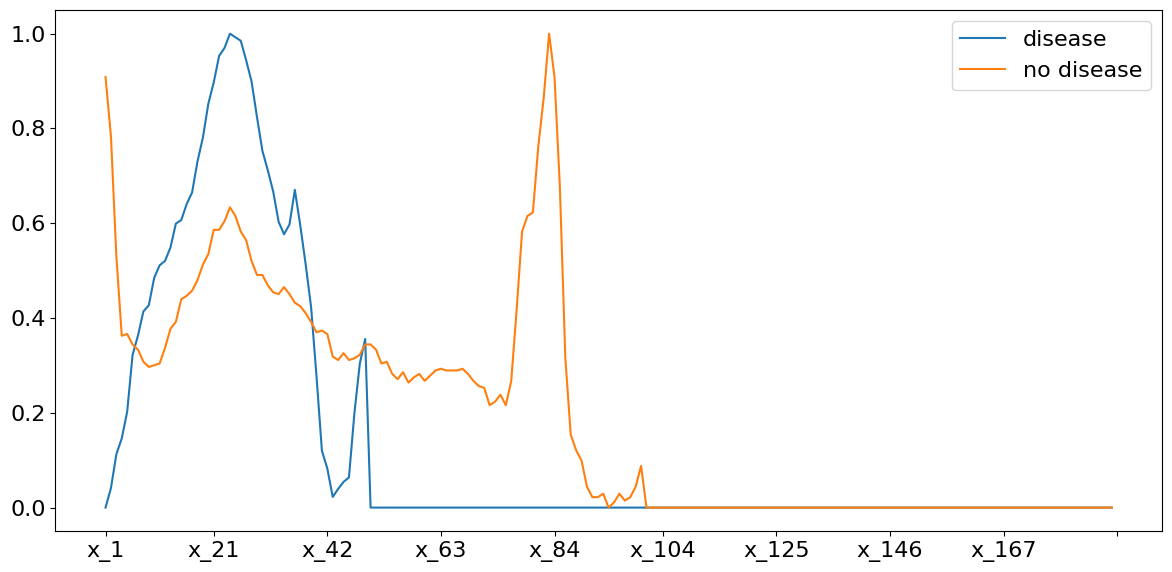

In [3]:
disease_idx = np.where(data['target']==1)[0][0]
no_disease_idx = np.where(data['target']==0)[0][0]

plt.figure(figsize=(12,6))
plt.plot(data.iloc[disease_idx][:-1],label='disease');
plt.plot(data.iloc[no_disease_idx][:-1],label='no disease');
plt.legend()
plt.xticks(np.linspace(0,len(data.iloc[disease_idx][:-1]),10,dtype=int))
plt.tight_layout()

❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [4]:
count_targets = list(data.target.value_counts())
# print(count_targets)
at_risk_count = count_targets[-1]
at_risk_count

1448

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [5]:
healthy_count = count_targets[0]
healthy_count

18117

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Check your code**

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/johnnyharika/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/johnnyharika/code/jharika23/data-electrocardiograms/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [21]:
X = data.drop(columns='target')
y = data['target']

model = LogisticRegression(max_iter=1000)

cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['accuracy',
                                     'recall', 
                                     'precision',
                                     'f1']
                           )
pd.DataFrame(cv_results)

Accuracy = 0.94
Precision = 0.69
Recall = 0.33
F1 score = 0.44


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.959281,0.011783,0.938922,0.296552,0.710744,0.418491
1,0.652850,0.010517,0.938922,0.355172,0.664516,0.462921
2,0.648536,0.011516,0.939944,0.362069,0.677419,0.471910
3,0.506637,0.010525,0.938410,0.328720,0.669014,0.440835
4,0.671850,0.011044,0.939688,0.307958,0.712000,0.429952


❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [23]:
# correct_pred_ratio = round(accuracy_score(y_test, y_pred), 2)
correct_pred_ratio = cv_results['test_accuracy'].mean()

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [24]:
# flag_ratio = round(recall_score(y_test, y_pred), 2)
flag_ratio = cv_results['test_recall'].mean()

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [25]:
# correct_detection_ratio = round(precision_score(y_test, y_pred), 2)
correct_detection_ratio = cv_results['test_precision'].mean()

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [26]:
# aggregated_metric = round(f1_score(y_test, y_pred), 2)
aggregated_metric = cv_results['test_f1'].mean()

🧪 **Check your code**

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/johnnyharika/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/johnnyharika/code/jharika23/data-electrocardiograms/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logistic

▶️ Run the following cell before moving on:

In [28]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

    
1. [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)    
2. ['ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`]((https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) your dataset and look at the confusion matrix on the test set.  
</details>



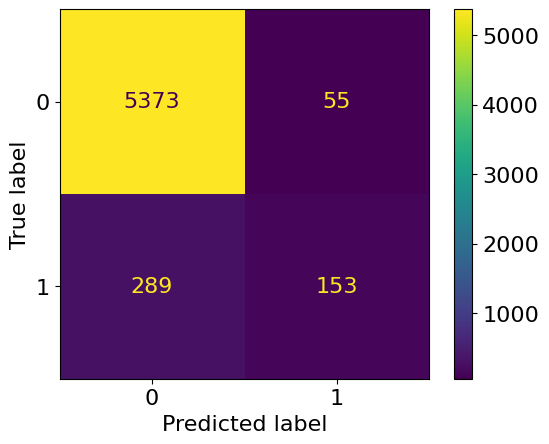

In [32]:
model = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=model.classes_).plot()

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

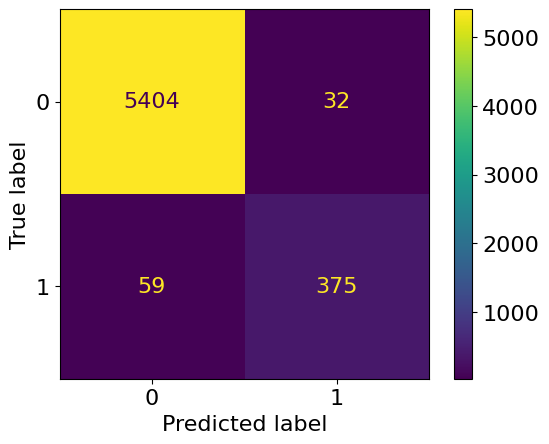

In [38]:
model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=model.classes_).plot()

best_model='KNN'

💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

🧪 **Check your code**

In [39]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/johnnyharika/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/johnnyharika/code/jharika23/data-electrocardiograms/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



## (6) Classification Report

Now that we have selected the KNN model thanks to its higherbest recall, let's have a look at the other classification performance metrics>

❓ **Question (Classification Report)** ❓

Print out a [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of the KNN model.

<details>
    <summary> 💡 <i>Hint</i>  </summary>
    
* You will need to pass the predictions of the model to a `classification_report`.
    
* SkLearn's [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) might help 😉
</details>




In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5436
           1       0.92      0.86      0.89       434

    accuracy                           0.98      5870
   macro avg       0.96      0.93      0.94      5870
weighted avg       0.98      0.98      0.98      5870



❓ **Question (Reading the report)** ❓


Among the heartbeats predicted at-risk, what is the ratio of correct predictions ? 

In mathematical terms, can you read the ratio $ \frac{TP}{TP + FP} $ in the report? What is the name of this classification metrics ? 

Save your answer as a float under `correct_at_risk_predictions`

In [ ]:
# YOUR CODE HERE

🧪 **Check your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())

## (7) Prediction

❓ **Question (Predicting)** ❓

A patient comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [ ]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

In [ ]:
# YOUR CODE HERE

🧪 **Check your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())

🏁 Congratulations!

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!